In [1]:
import pandas as pd
import os 
import sys



In [3]:
csv_base_dir = '/home/gokkulnath/Mosquito/'
train_df = pd.read_csv(f"{csv_base_dir}/train.csv")
test_df = pd.read_csv(f"{csv_base_dir}/test_phase1_v2.csv")

idx2lab = { 0: "culex",
 1: "albopictus",
 2: "culiseta",
 3: "japonicus/koreicus",
 4: "anopheles",
 5: "aegypti"}
lab2idx = {v:k for k,v in idx2lab.items()}

train_df['fname']=train_df['img_fName'].apply(lambda x: x.rstrip(".jpeg"))
train_df['class_code']=train_df['class_label'].apply(lambda x : lab2idx[x])



In [12]:
train_df

,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label,fname,class_code
0,92715872-3287-4bff-aa61-7047973e5c02.jpeg,2448,3264,1301,1546,1641,2096,albopictus,92715872-3287-4bff-aa61-7047973e5c02,1
1,b0f7cc74-2272-4756-a387-38bcaf6965c8.jpeg,3024,4032,900,1897,1950,2990,albopictus,b0f7cc74-2272-4756-a387-38bcaf6965c8,1
2,82df4b68-0f45-4afe-9215-48488bf3720e.jpeg,768,1024,220,58,659,808,albopictus,82df4b68-0f45-4afe-9215-48488bf3720,1
3,331ad30a-7564-4478-b863-7bc760adf5a1.jpeg,3456,4608,1169,2364,1586,2826,albopictus,331ad30a-7564-4478-b863-7bc760adf5a1,1
4,1a46dbfb-104e-466b-88d7-98958d7b1fe9.jpeg,1024,1365,129,231,697,1007,culex,1a46dbfb-104e-466b-88d7-98958d7b1fe9,0
...,...,...,...,...,...,...,...,...,...,...
8020,ca1468e3-1337-48b3-b378-135758317454.jpeg,4160,2080,2055,704,2494,998,albopictus,ca1468e3-1337-48b3-b378-135758317454,1
8021,c2e77768-61ba-4e27-907d-fe3198e8f5ce.jpeg,3024,4032,1073,875,1830,1503,culiseta,c2e77768-61ba-4e27-907d-fe3198e8f5c,2
8022,d7521d94-92f7-40a1-9cd5-74a0b67ca98b.jpeg,1024,1365,341,485,761,1123,albopictus,d7521d94-92f7-40a1-9cd5-74a0b67ca98b,1
8023,03098cc0-ee82-4fa0-b045-579951b7855c.jpeg,2128,4608,869,1235,2128,2631,culex,03098cc0-ee82-4fa0-b045-579951b7855c,0


<Axes: >

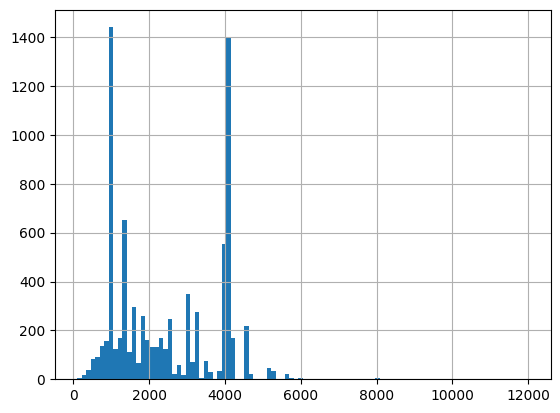

In [10]:
train_df.img_h.hist(bins=100)

<Axes: >

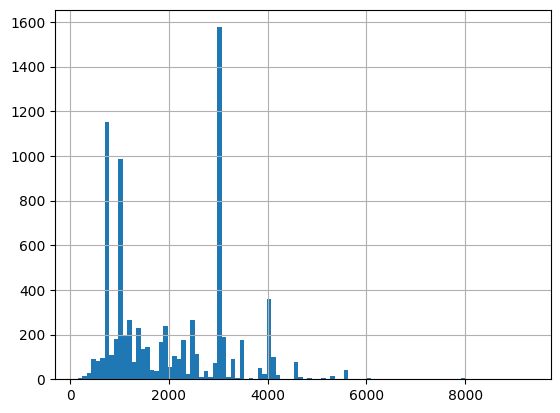

In [11]:
train_df.img_w.hist(bins=100)

# Validation Split

In [ ]:
# Train validation Split 
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42, shuffle=True, stratify=train_df.class_code)

# Prepare Label

In [ ]:
# https://medium.com/analytics-vidhya/basics-of-bounding-boxes-94e583b5e16c
# (x1, y1): Corresponds to the x and y coordinate of the top left corner of the rectangle.
# (x2, y2): Corresponds to the x and y coordinate of the bottom right corner of the rectangle.
# (xc, yc): Corresponds to the x and y coordinate of the center of the bounding box.
# Width: Represents the width of the bounding box.
# Height: Represents the height of the bounding box.

# xc = ( a.bbx_xtl + a.bbx_xbr ) / 2
# yc = ( a.bbx_ytl + a.bbx_ybr ) / 2
# width = ( a.bbx_xbr — a.bbx_xtl)
# height = (a.bbx_ybr — a.bbx_ytl)

from PIL import Image
# Image.open(f"{base_path}/images/train_images/{a.img_fName}")
import cv2
import os 
def perpare_label(a,debug=False):
    with open(os.path.join(base_label_path,f'{a.fname}.txt'),'w') as f:
        xc = (( a.bbx_xtl + a.bbx_xbr ) / 2) / a.img_w
        yc = (( a.bbx_ytl + a.bbx_ybr ) / 2) / a.img_h
        width = ( a.bbx_xbr - a.bbx_xtl)/a.img_w
        height = (a.bbx_ybr - a.bbx_ytl)/a.img_h
        row = [a.class_code, xc, yc, width,height]
        label_str = " ".join([str(r) for r in row])
        # print(label_str)
        f.writelines(label_str)
    if debug:
        img = cv2.imread(f"{base_path}/images/train_images/{a.img_fName}")
        start_point = (int(a.bbx_xtl), int(a.bbx_ytl))
        end_point = (int(a.bbx_xbr), int(a.bbx_ybr))
        cv2.rectangle(img, start_point, end_point, color=(0,255,0), thickness=2)   
        cv2.imwrite("example_with_bounding_boxes.jpg", img)